# Exercise 5

1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

## Load the dataset from CSV into pandas

In [2]:
# Standard imports for pandas and sklearn sample datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the mushroom data
mushroom_data = pd.read_csv('agaricus-lepiota.data')

#print(mushroom_data)

# Convert it to a pandas DataFrame
df = pd.DataFrame(mushroom_data)

# A summary of the data
df.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Explore the distributions in the data. 

### How edibility is distributed across cap-shapes

In [4]:
grouped_df = df.groupby(['edibility', 'cap-shape']).size().reset_index(name='count')
edible_grouped = grouped_df[grouped_df['edibility'] == 'e']
total_edible = edible_grouped['count'].sum()

# Print the edible list
print("Edible Mushrooms by Cap Shape:")
print(edible_grouped[['cap-shape', 'count']])
print(f"Total Edible Mushrooms: {total_edible}\n")

Edible Mushrooms by Cap Shape:
  cap-shape  count
0         b    404
1         f   1596
2         k    228
3         s     32
4         x   1948
Total Edible Mushrooms: 4208



In [5]:
non_edible_grouped = grouped_df[grouped_df['edibility'] == 'p']
total_non_edible = non_edible_grouped['count'].sum()

# Print the non-edible list
print("Non-Edible Mushrooms by Cap Shape:")
print(non_edible_grouped[['cap-shape', 'count']])
print(f"Total Non-Edible Mushrooms: {total_non_edible}")

Non-Edible Mushrooms by Cap Shape:
  cap-shape  count
5         b     48
6         c      4
7         f   1556
8         k    600
9         x   1708
Total Non-Edible Mushrooms: 3916


### habitat distributed between edibility vs non-edibility

In [13]:
selected_columns = df[['habitat', 'edibility']]

grouped_by_habitat = selected_columns.groupby('habitat')

grouped_by_habitat.describe().transpose()

habitat              d     g    l    m     p    u    w
edibility count   3148  2148  832  292  1144  368  192
          unique     2     2    2    2     2    2    1
          top        e     e    p    e     p    p    e
          freq    1880  1408  592  256  1008  272  192

In [7]:
grouped_df = df.groupby(['edibility', 'habitat']).size().reset_index(name='count')
edible_grouped = grouped_df[grouped_df['edibility'] == 'e']
non_edible_grouped = grouped_df[grouped_df['edibility'] == 'p']

# Table for both
pivot_table = grouped_df.pivot(index='habitat', columns='edibility', values='count')

# Fill NaN values with 0, if any
pivot_table.fillna(0, inplace=True)

# Show the table
print(pivot_table)

edibility       e       p
habitat                  
d          1880.0  1268.0
g          1408.0   740.0
l           240.0   592.0
m           256.0    36.0
p           136.0  1008.0
u            96.0   272.0
w           192.0     0.0


In [8]:
# Print the edible list
print("Edible Mushrooms by habitat:")
print(edible_grouped[['habitat', 'count']])

Edible Mushrooms by habitat:
  habitat  count
0       d   1880
1       g   1408
2       l    240
3       m    256
4       p    136
5       u     96
6       w    192


In [9]:
# Print the non-edible list
print("Non-Edible Mushrooms by habitat:")
print(non_edible_grouped[['habitat', 'count']])

Non-Edible Mushrooms by habitat:
   habitat  count
7        d   1268
8        g    740
9        l    592
10       m     36
11       p   1008
12       u    272


In [10]:
# Convert all categorical variables to dummy variables
dummy_df = pd.get_dummies(df)
dummy_df


,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


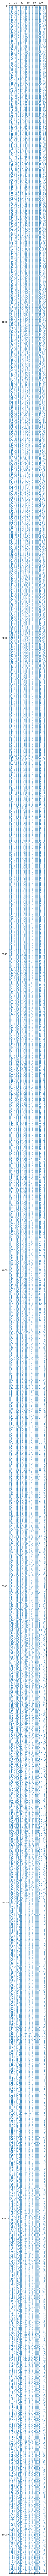

In [11]:
plt.spy(dummy_df, markersize=0.5)
fig = plt.gcf()
fig.set_size_inches(60,200)
plt.plot()
plt.show()